In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [3]:
from matplotlib import font_manager, rc
import sys
if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"
rc('font',family=font_name)

데이터가 성공적으로 로드되고 계산되었습니다. 시각화를 시작합니다...


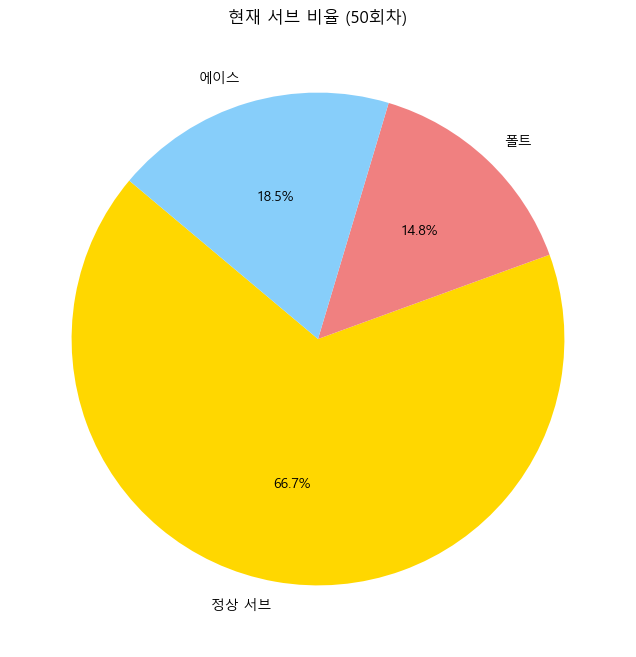

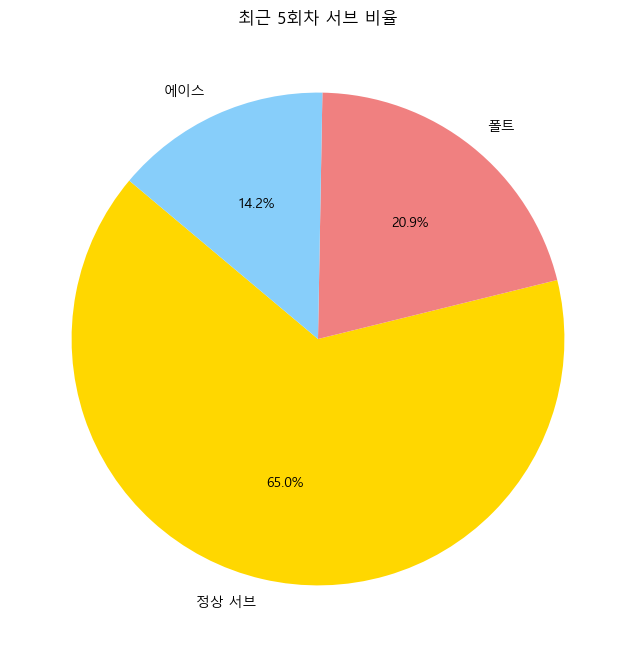

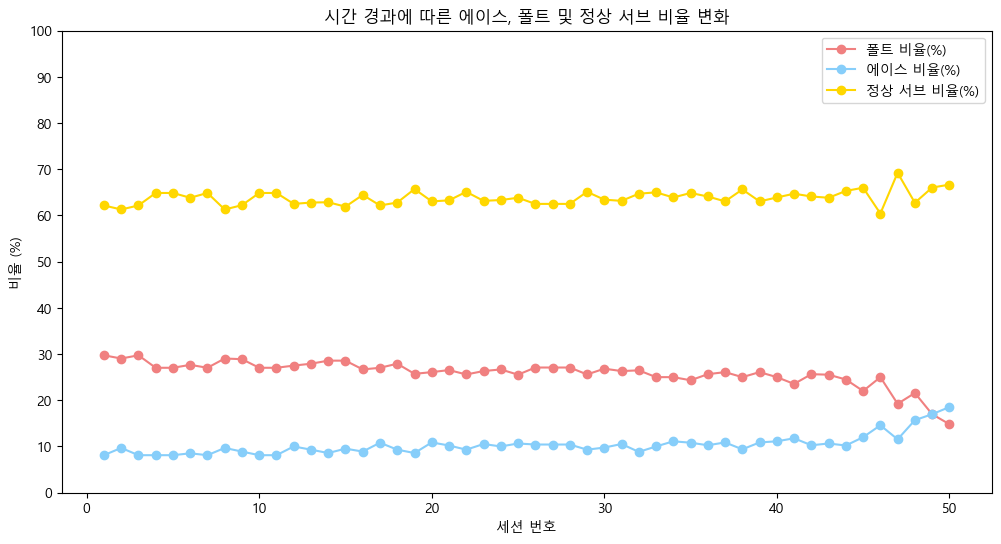

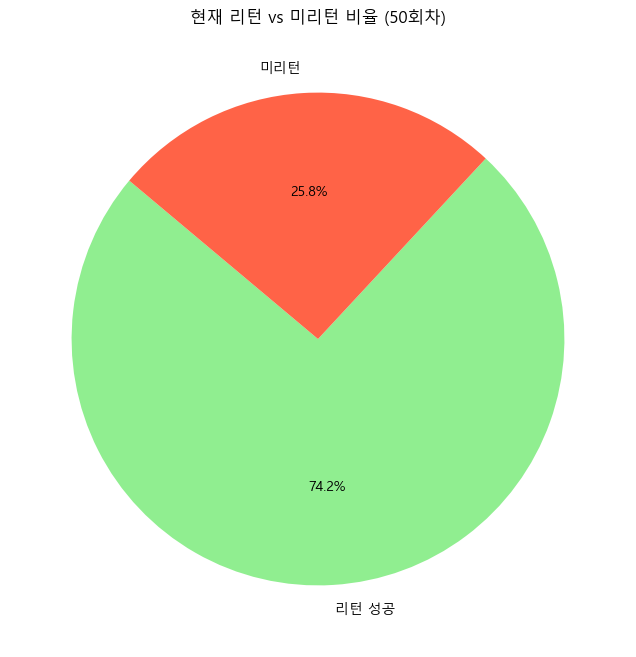

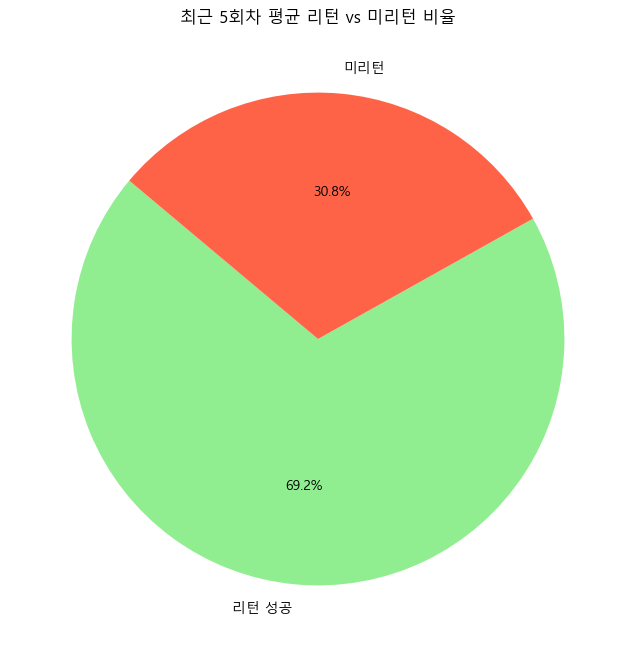

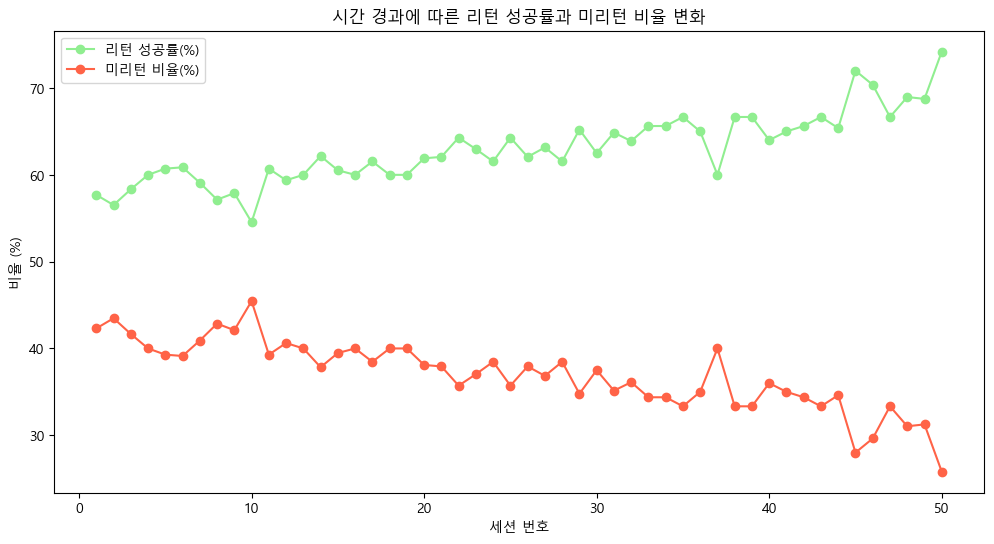

In [ ]:
# 데이터셋 로드 함수
def load_data(file_path):
    return pd.read_excel(file_path)

# 추가 지표 계산 함수
def calculate_metrics(data):
    data['폴트 비율(%)'] = (data['폴트 횟수'] / data['서브 횟수']) * 100
    data['에이스 비율(%)'] = (data['에이스 횟수'] / data['서브 횟수']) * 100
    data['리턴 성공률(%)'] = (data['리턴 성공 횟수'] / data['리턴 시도 수']) * 100
    data['미리턴 비율(%)'] = (data['미리턴 횟수'] / data['리턴 시도 수']) * 100
    data['정상 서브 비율(%)'] = 100 - (data['폴트 비율(%)'] + data['에이스 비율(%)'])
    return data

# 현재 세션의 서브 결과 비율을 파이 차트로 시각화하는 함수
def plot_recent_pie_chart(data):
    recent_data = data.iloc[-1]
    labels = ['정상 서브', '폴트', '에이스']
    total_serves = recent_data['서브 횟수']
    normal_serves = total_serves - (recent_data['폴트 횟수'] + recent_data['에이스 횟수'])
    sizes = [normal_serves, recent_data['폴트 횟수'], recent_data['에이스 횟수']]
    colors = ['gold', 'lightcoral', 'lightskyblue']

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'현재 서브 비율 ({recent_data["세션 번호"]}회차)')
    plt.show()

# 직전 5회차(44~49회차)의 평균 서브 결과 비율을 파이 차트로 시각화하는 함수
def plot_average_recent_5_sessions_pie_chart(data):
    average_recent_5 = data.iloc[-6:-1]
    avg_serves = average_recent_5['서브 횟수'].mean()
    avg_faults = average_recent_5['폴트 횟수'].mean()
    avg_aces = average_recent_5['에이스 횟수'].mean()
    avg_normal_serves = avg_serves - (avg_faults + avg_aces)
    sizes = [avg_normal_serves, avg_faults, avg_aces]
    labels = ['정상 서브', '폴트', '에이스']
    colors = ['gold', 'lightcoral', 'lightskyblue']

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('최근 5회차 서브 비율')
    plt.show()

# 전체 세션에 대한 서브 결과 비율의 변화를 라인 그래프로 시각화하는 함수
def plot_line_graph_with_minimal_units(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['세션 번호'], data['폴트 비율(%)'], label='폴트 비율(%)', marker='o', color='lightcoral')
    plt.plot(data['세션 번호'], data['에이스 비율(%)'], label='에이스 비율(%)', marker='o', color='lightskyblue')
    plt.plot(data['세션 번호'], data['정상 서브 비율(%)'], label='정상 서브 비율(%)', marker='o', color='gold')
    plt.title('시간 경과에 따른 에이스, 폴트 및 정상 서브 비율 변화')
    plt.xlabel('세션 번호')
    plt.ylabel('비율 (%)')
    plt.legend()
    plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))
    plt.ylim(0, 100)
    plt.show()

# 현재 세션의 리턴 성공률과 미리턴 비율을 파이 차트로 시각화하는 함수
def plot_current_return_vs_miss_pie_chart(data):
    current_data = data.iloc[-1]
    total_returns = current_data['리턴 성공 횟수']
    total_misses = current_data['미리턴 횟수']
    labels = ['리턴 성공', '미리턴']
    sizes = [total_returns, total_misses]
    colors = ['lightgreen', 'tomato']
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'현재 리턴 vs 미리턴 비율 ({current_data["세션 번호"]}회차)')
    plt.show()


# 직전 5회차 (44~49회차) 리턴 성공률과 미리턴 비율을 파이 차트로 시각화하는 함수
def plot_average_recent_5_sessions_return_vs_miss_pie_chart(data):
    average_recent_5 = data.iloc[-6:-1]  # 마지막에서 6번째부터 두 번째까지 (마지막은 최근 회차)
    avg_returns = average_recent_5['리턴 성공 횟수'].mean()
    avg_misses = average_recent_5['미리턴 횟수'].mean()
    labels = ['리턴 성공', '미리턴']
    sizes = [avg_returns, avg_misses]
    colors = ['lightgreen', 'tomato']
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('최근 5회차 평균 리턴 vs 미리턴 비율')
    plt.show()



# 전체 세션에 대한 리턴 성공률과 미리턴 비율의 변화를 라인 그래프로 시각화하는 함수
def plot_return_vs_miss_line_graph(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['세션 번호'], data['리턴 성공률(%)'], label='리턴 성공률(%)', marker='o', color='lightgreen')
    plt.plot(data['세션 번호'], data['미리턴 비율(%)'], label='미리턴 비율(%)', marker='o', color='tomato')
    plt.title('시간 경과에 따른 리턴 성공률과 미리턴 비율 변화')
    plt.xlabel('세션 번호')
    plt.ylabel('비율 (%)')
    plt.legend()
    plt.show()

# 메인 함수: 데이터 로드, 계산 및 시각화를 실행
def main():
    file_path = "..\\analysis\\테니스_세션_데이터_v03.xlsx"
    data = load_data(file_path)
    data = calculate_metrics(data)
    print("데이터가 성공적으로 로드되고 계산되었습니다. 시각화를 시작합니다...")
    plot_recent_pie_chart(data)
    plot_average_recent_5_sessions_pie_chart(data)
    plot_line_graph_with_minimal_units(data)
    plot_current_return_vs_miss_pie_chart(data)
    plot_average_recent_5_sessions_return_vs_miss_pie_chart(data)
    plot_return_vs_miss_line_graph(data)

if __name__ == "__main__":
    main()
